In [386]:
import sys
import string
from bs4 import BeautifulSoup, NavigableString, Comment
import pandas as pd
import unicodedata
from IPython.display import display, HTML
import numpy as np
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc

import requests
import re

  
page = requests.get("https://tripadvisor.mediaroom.com/2017-04-05-TripAdvisor-Reveals-The-Best-Time-To-Book-Hotels-For-Maximum-Summer-Travel-Savings")

soup = BeautifulSoup(page.content, 'html.parser')

# initialize list of lists
list1 = soup.find_all("li")[27:82]
list2 = soup.find_all("li")[20:26]


In [ ]:
# clean up all the extracted text from the html markup and place into a list array
when_to_book_chicago = list2[0].get_text(strip=True).replace('Chicago:Book within 2 months for 18% savings','within 2 months').replace("Average summer hotel rate:$292/night", " ")
avg_summer_hotel_rate_chicago = list2[0].get_text(strip=True).replace('Chicago:Book within 2 months for 18% savings','').replace("Average summer hotel rate:$292/night", "$292/night")
savings_chicago = list2[0].get_text(strip=True).replace('Chicago:Book within 2 months for 18% savings', '18%').replace("Average summer hotel rate:$292/night"," ")

when_to_book_ny = list2[2].get_text(strip=True).replace('New York City:Book within 2 months for 23% savings','within 2 months').replace("Average summer hotel rate:$325/night", " ")
avg_summer_hotel_rate_ny = list2[2].get_text(strip=True).replace('New York City:Book within 2 months for 23% savings','').replace("Average summer hotel rate:$325/night", "$325/night")
savings_ny = list2[2].get_text(strip=True).replace('New York City:Book within 2 months for 23% savings', '23%').replace("Average summer hotel rate:$325/night"," ")

when_to_book_orlando = list2[4].get_text(strip=True).replace('Orlando:Book within 6 months for 9% savings','within 6 months').replace("Average summer hotel rate:$163/night", " ")
avg_summer_hotel_rate_orlando = list2[4].get_text(strip=True).replace('Orlando:Book within 6 months for 9% savings','').replace("Average summer hotel rate:$163/night", "$325/night")
savings_orlando = list2[4].get_text(strip=True).replace('Orlando:Book within 6 months for 9% savings', '9%').replace("Average summer hotel rate:$163/night"," ")

when_to_book_bangkok = list1[0].get_text(strip=True).replace('Bangkok:Book within 6 months for 19% savings','within 6 months').replace("Average summer hotel rate:$63/night", " ")
avg_summer_hotel_rate_bangkok = list1[0].get_text(strip=True).replace('Bangkok:Book within 6 months for 19% savings',' ').replace("Average summer hotel rate:"," ")
savings_bangkok = list1[0].get_text(strip=True).replace('Bangkok:Book within 6 months for 19% savings', '19%').replace("Average summer hotel rate:$63/night"," ")

when_to_book_barca = list1[2].get_text(strip=True).replace('Barcelona:Book 3-9 months out for 33% savings','3-9 months out').replace("Average summer hotel rate:$199/night", " ")
avg_summer_hotel_rate_barca = list1[2].get_text(strip=True).replace('Barcelona:Book 3-9 months out for 33% savings', ' ').replace("Average summer hotel rate:"," ")
savings_barca = list1[2].get_text(strip=True).replace('Barcelona:Book 3-9 months out for 33% savings', '33%').replace("Average summer hotel rate:$199/night"," ")

when_to_book_beijing = list1[4].get_text(strip=True).replace('Beijing:Book 2-3 months out for 17% savings', '2-3 months out').replace("Average summer hotel rate:$102/night", " ")
avg_summer_hotel_rate_beijing = list1[4].get_text(strip=True).replace('Beijing:Book 2-3 months out for 17% savings', '').replace("Average summer hotel rate:"," ")
savings_beijing = list1[4].get_text(strip=True).replace('Beijing:Book 2-3 months out for 17% savings', '17%').replace("Average summer hotel rate:$102/night"," ")

when_to_book_berlin = list1[6].get_text(strip=True).replace('Berlin:Book 4-8 months out for 10% savings','4-8 months out').replace("Average summer hotel rate:$104/night", " ")
avg_summer_hotel_rate_berlin = list1[6].get_text(strip=True).replace('Berlin:Book 4-8 months out for 10% savings', '').replace("Average summer hotel rate:"," ")
savings_berlin = list1[6].get_text(strip=True).replace('Berlin:Book 4-8 months out for 10% savings', '10%').replace("Average summer hotel rate:$104/night"," ")

when_to_book_budapest = list1[8].get_text(strip=True).replace('Budapest:Book',' ').replace("Average summer hotel rate:$94/night", " ")
avg_summer_hotel_rate_budapest = list1[8].get_text(strip=True).replace('Book 3-5 months out for 35% savings', ' ').replace("Average summer hotel rate:"," ")

when_to_book_ba = list1[10].get_text(strip=True).replace('Buenos Aires:Book within 6 months for 16% savings','within 6 months').replace("Average summer hotel rate:$89/night", " ")
avg_summer_hotel_rate_ba = list1[10].get_text(strip=True).replace('Buenos Aires:Book within 6 months for 16% savings', ' ').replace("Average summer hotel rate:"," ")
savings_ba = list1[10].get_text(strip=True).replace('Buenos Aires:Book within 6 months for 16% savings', '16%').replace("Average summer hotel rate:$89/night"," ")

when_to_book_cancun = list1[12].get_text(strip=True).replace('Cancun:Book within 4 months for 11% savings','within 4 months').replace("Average summer hotel rate:$156/night", " ")
avg_summer_hotel_rate_cancun = list1[12].get_text(strip=True).replace('Cancun:Book within 4 months for 11% savings', ' ').replace("Average summer hotel rate:"," ")
savings_cancun = list1[12].get_text(strip=True).replace('Cancun:Book within 4 months for 11% savings', '11%').replace("Average summer hotel rate:$156/night"," ")

when_to_book_capetown = list1[14].get_text(strip=True).replace('Cape Town:Book within 4 months for 18% savings','within 4 months').replace("Average summer hotel rate:$106/night", " ")
avg_summer_hotel_rate_capetown = list1[14].get_text(strip=True).replace('Cape Town:Book within 4 months for 18% savings', ' ').replace("Average summer hotel rate:"," ")
savings_capetown = list1[14].get_text(strip=True).replace('Cape Town:Book within 4 months for 18% savings', '18%').replace("Average summer hotel rate:$106/night"," ")

when_to_book_dubai = list1[16].get_text(strip=True).replace('Dubai:Book within 6 months for 24% savings','within 6 months').replace("Average summer hotel rate:$158/night", " ")
avg_summer_hotel_rate_dubai = list1[16].get_text(strip=True).replace('Dubai:Book within 6 months for 24% savings', ' ').replace("Average summer hotel rate:"," ")
savings_dubai = list1[16].get_text(strip=True).replace('Dubai:Book within 6 months for 24% savings', '24%').replace("Average summer hotel rate:$158/night"," ")

when_to_book_dublin = list1[18].get_text(strip=True).replace('Dublin:Book 4-8 months out for 16% savings','4-8 months out').replace("Average summer hotel rate:$173/night", " ")
avg_summer_hotel_rate_dublin = list1[18].get_text(strip=True).replace('Dublin:Book 4-8 months out for 16% savings', ' ').replace("Average summer hotel rate:"," ")
savings_dublin = list1[18].get_text(strip=True).replace('Dublin:Book 4-8 months out for 16% savings', '16%').replace("Average summer hotel rate:$173/night"," ")

when_to_book_hanoi = list1[20].get_text(strip=True).replace('Hanoi:Book 3-7 months out for 17% savings','3-7 months out').replace("Average summer hotel rate:$133/night", " ")
avg_summer_hotel_rate_hanoi = list1[20].get_text(strip=True).replace('Hanoi:Book 3-7 months out for 17% savings', ' ').replace("Average summer hotel rate:"," ")
savings_hanoi = list1[20].get_text(strip=True).replace('Hanoi:Book 3-7 months out for 17% savings', '17%').replace("Average summer hotel rate:$133/night"," ")

when_to_book_hk = list1[22].get_text(strip=True).replace('Hong Kong:Book within 5 months for 23% savings','within 5 months').replace("Average summer hotel rate:$107/night", " ")
avg_summer_hotel_rate_hk = list1[22].get_text(strip=True).replace('Hong Kong:Book within 5 months for 23% savings', ' ').replace("Average summer hotel rate:"," ")
savings_hk = list1[22].get_text(strip=True).replace('Hong Kong:Book within 5 months for 23% savings', '23%').replace("Average summer hotel rate:$107/night"," ")

when_to_book_istanbul = list1[24].get_text(strip=True).replace('Istanbul:Book within 5 months for 33% savings','within 5 months').replace("Average summer hotel rate:$93/night", " ")
avg_summer_hotel_rate_istanbul = list1[24].get_text(strip=True).replace('Istanbul:Book within 5 months for 33% savings', ' ').replace("Average summer hotel rate:"," ")
savings_istanbul = list1[24].get_text(strip=True).replace('Istanbul:Book within 5 months for 33% savings', '33%').replace("Average summer hotel rate:$93/night"," ")

when_to_book_jakarta = list1[26].get_text(strip=True).replace('Jakarta:Book within 6 months for 22% savings','within 6 months').replace("Average summer hotel rate:$50/night", " ")
avg_summer_hotel_rate_jakarta = list1[26].get_text(strip=True).replace('Jakarta:Book within 6 months for 22% savings', ' ').replace("Average summer hotel rate:"," ")
savings_jakarta = list1[26].get_text(strip=True).replace('Jakarta:Book within 6 months for 22% savings', '22%').replace("Average summer hotel rate:$50/night"," ")

when_to_book_bali = list1[28].get_text(strip=True).replace('Kuta (Bali):Book within 7 months for 18% savings','within 7 months').replace("Average summer hotel rate:$278/night", " ")
avg_summer_hotel_rate_bali = list1[28].get_text(strip=True).replace('Kuta (Bali):Book within 7 months for 18% savings', ' ').replace("Average summer hotel rate:"," ")
savings_bali = list1[28].get_text(strip=True).replace('Kuta (Bali):Book within 7 months for 18% savings', '18%').replace("Average summer hotel rate:$278/night"," ")

when_to_book_lisbon = list1[30].get_text(strip=True).replace('Lisbon:Book 4-8 months out for 14% savings','4-8 months out').replace("Average summer hotel rate:$183/night", " ")
avg_summer_hotel_rate_lisbon = list1[30].get_text(strip=True).replace('Lisbon:Book 4-8 months out for 14% savings', ' ').replace("Average summer hotel rate:"," ")
savings_lisbon = list1[30].get_text(strip=True).replace('Lisbon:Book 4-8 months out for 14% savings', '14%').replace("Average summer hotel rate:$183/night"," ")

when_to_book_london = list1[32].get_text(strip=True).replace('London:Book 5-8 months out for 12% savings (travelers yet to book can consistently find rates below the average within 8 months with an opportunity for deeper savings within a month of their trip)','5-8 months out').replace("Average summer hotel rate:$264/night", " ")
avg_summer_hotel_rate_london = list1[32].get_text(strip=True).replace('London:Book 5-8 months out for 12% savings (travelers yet to book can consistently find rates below the average within 8 months with an opportunity for deeper savings within a month of their trip)', ' ').replace("Average summer hotel rate:"," ")
savings_london = list1[32].get_text(strip=True).replace('London:Book 5-8 months out for 12% savings (travelers yet to book can consistently find rates below the average within 8 months with an opportunity for deeper savings within a month of their trip)', '12%').replace("Average summer hotel rate:$264/night"," ")

when_to_book_marrakech = list1[34].get_text(strip=True).replace('Marrakech:Book 4-6 months out for 20% savings','4-6 months out').replace("Average summer hotel rate:$106/night", " ")
avg_summer_hotel_rate_marrakech = list1[34].get_text(strip=True).replace('Marrakech:Book 4-6 months out for 20% savings', ' ').replace("Average summer hotel rate:"," ")
savings_marrakech = list1[34].get_text(strip=True).replace('Marrakech:Book 4-6 months out for 20% savings', '12%').replace("Average summer hotel rate:$106/night"," ")

when_to_book_moscow = list1[36].get_text(strip=True).replace('Moscow:Book within 3 months for 14% savings','within 3 months').replace("Average summer hotel rate:$54/night", " ")
avg_summer_hotel_rate_moscow = list1[36].get_text(strip=True).replace('Moscow:Book within 3 months for 14% savings', ' ').replace("Average summer hotel rate:"," ")
savings_moscow = list1[36].get_text(strip=True).replace('Moscow:Book within 3 months for 14% savings', '15%').replace("Average summer hotel rate:$54/night"," ")

when_to_book_mumbai = list1[38].get_text(strip=True).replace('Mumbai:Book within 3 months for 24% savings','within 3 months').replace("Average summer hotel rate:$73/night", " ")
avg_summer_hotel_rate_mumbai = list1[38].get_text(strip=True).replace('Mumbai:Book within 3 months for 24% savings', ' ').replace("Average summer hotel rate:"," ")
savings_mumbai = list1[38].get_text(strip=True).replace('Mumbai:Book within 3 months for 24% savings', '24%').replace("Average summer hotel rate:$73/night"," ")

when_to_book_paris = list1[40].get_text(strip=True).replace('Paris:Book within 2 months to save up to 23%','within 2 months').replace("Average summer hotel rate:$188/night", " ")
avg_summer_hotel_rate_paris = list1[40].get_text(strip=True).replace('Paris:Book within 2 months to save up to 23%', ' ').replace("Average summer hotel rate:"," ")
savings_paris = list1[40].get_text(strip=True).replace('Paris:Book within 2 months to save up to 23%', '23%').replace("Average summer hotel rate:$188/night"," ")

when_to_book_prague = list1[42].get_text(strip=True).replace('Prague:Book 3-7 months out with 24% savings','3-7 months out').replace("Average summer hotel rate:$97/night", " ")
avg_summer_hotel_rate_prague = list1[42].get_text(strip=True).replace('Prague:Book 3-7 months out with 24% savings', ' ').replace("Average summer hotel rate:"," ")
savings_prague = list1[42].get_text(strip=True).replace('Prague:Book 3-7 months out with 24% savings', '24%').replace("Average summer hotel rate:$97/night"," ")

when_to_book_providenciales = list1[44].get_text(strip=True).replace('Providenciales:Book 3-5 months out for 22% savings','3-5 months out').replace("Average summer hotel rate:$518/night", " ")
avg_summer_hotel_rate_providenciales = list1[44].get_text(strip=True).replace('Providenciales:Book 3-5 months out for 22% savings', ' ').replace("Average summer hotel rate:"," ")
savings_providenciales = list1[44].get_text(strip=True).replace('Providenciales:Book 3-5 months out for 22% savings', '22%').replace("Average summer hotel rate:$518/night"," ")

when_to_book_rome = list1[46].get_text(strip=True).replace('Rome:Book 4-8 months out to save 21% on hotels','4-8 months out').replace("Average summer hotel rate:$125/night", " ")
avg_summer_hotel_rate_rome = list1[46].get_text(strip=True).replace('Rome:Book 4-8 months out to save 21% on hotels', ' ').replace("Average summer hotel rate:"," ")
savings_rome = list1[46].get_text(strip=True).replace('Rome:Book 4-8 months out to save 21% on hotels', '21%').replace("Average summer hotel rate:$125/night"," ")

when_to_book_singapore = list1[48].get_text(strip=True).replace('Singapore:Book 6-7 months out for 18% savings (travelers yet to book can consistently find rates below the average within 8 months)','6-7 months out').replace("Average summer hotel rate:$215/night", " ")
avg_summer_hotel_rate_singapore = list1[48].get_text(strip=True).replace('Singapore:Book 6-7 months out for 18% savings (travelers yet to book can consistently find rates below the average within 8 months)', ' ').replace("Average summer hotel rate:"," ")
savings_singapore = list1[48].get_text(strip=True).replace('Singapore:Book 6-7 months out for 18% savings (travelers yet to book can consistently find rates below the average within 8 months)', '18%').replace("Average summer hotel rate:$215/night"," ")

when_to_book_sydney = list1[50].get_text(strip=True).replace('Sydney:Book within 3 months for 11% savings','within 3 months').replace("Average summer hotel rate:$137/night", " ")
avg_summer_hotel_rate_sydney = list1[50].get_text(strip=True).replace('Sydney:Book within 3 months for 11% savings', ' ').replace("Average summer hotel rate:"," ")
savings_sydney = list1[50].get_text(strip=True).replace('Sydney:Book within 3 months for 11% savings', '11%').replace("Average summer hotel rate:$137/night"," ")

when_to_book_tokyo = list1[52].get_text(strip=True).replace('Tokyo:Book 4-7 months out for 18% savings','4-7 months out').replace("Average summer hotel rate:$139/night", " ")
avg_summer_hotel_rate_tokyo = list1[52].get_text(strip=True).replace('Tokyo:Book 4-7 months out for 18% savings', ' ').replace("Average summer hotel rate:"," ")
savings_tokyo = list1[52].get_text(strip=True).replace('Tokyo:Book 4-7 months out for 18% savings', '18%').replace("Average summer hotel rate:$139/night"," ")

In [387]:

# place all the list data into each column 
data = [
    ['Chicago', when_to_book_chicago, savings_chicago, avg_summer_hotel_rate_chicago],
    ['New York City', when_to_book_ny, savings_ny, avg_summer_hotel_rate_ny],
    ['Orlando', when_to_book_orlando, savings_orlando, avg_summer_hotel_rate_orlando],
    ['Bangkok',when_to_book_bangkok, savings_bangkok, avg_summer_hotel_rate_bangkok],
    ['Barcelona',when_to_book_barca, savings_barca, avg_summer_hotel_rate_barca],
    ['Beijing', when_to_book_beijing, savings_beijing, avg_summer_hotel_rate_beijing],
    ['Berlin', when_to_book_berlin, savings_berlin, avg_summer_hotel_rate_berlin],
    ['Buenos Aires', when_to_book_ba, savings_ba, avg_summer_hotel_rate_ba],
    ['Cancun', when_to_book_cancun, savings_cancun, avg_summer_hotel_rate_cancun],
    ['Cape Town', when_to_book_capetown, savings_capetown, avg_summer_hotel_rate_capetown],
    ['Dubai', when_to_book_dubai, savings_dubai, avg_summer_hotel_rate_dubai],
    ['Dublin', when_to_book_dublin, savings_dublin, avg_summer_hotel_rate_dublin],
    ['Hanoi', when_to_book_hanoi, savings_hanoi, avg_summer_hotel_rate_hanoi],
    ['Hong Kong', when_to_book_hk, savings_hk, avg_summer_hotel_rate_hk],
    ['Istanbul', when_to_book_istanbul, savings_istanbul, avg_summer_hotel_rate_istanbul],
    ['Jakarta', when_to_book_jakarta, savings_jakarta, avg_summer_hotel_rate_jakarta],
    ['Kuta (Bali)', when_to_book_bali, savings_bali, avg_summer_hotel_rate_bali],
    ['Lisbon', when_to_book_lisbon, savings_lisbon, avg_summer_hotel_rate_lisbon],
    ['London', when_to_book_london, savings_london, avg_summer_hotel_rate_london],
    ['Marrakech', when_to_book_marrakech, savings_marrakech, avg_summer_hotel_rate_marrakech],
    ['Moscow', when_to_book_moscow, savings_moscow, avg_summer_hotel_rate_moscow],
    ['Mumbai', when_to_book_mumbai, savings_mumbai, avg_summer_hotel_rate_mumbai],
    ['Paris', when_to_book_paris, savings_paris, avg_summer_hotel_rate_paris],
    ['Prague', when_to_book_prague, savings_prague, avg_summer_hotel_rate_prague],
    ['Providenciales', when_to_book_providenciales, savings_providenciales, avg_summer_hotel_rate_providenciales],
    ['Rome', when_to_book_rome, savings_rome, avg_summer_hotel_rate_rome],
    ['Singapore', when_to_book_singapore, savings_singapore, avg_summer_hotel_rate_singapore],
    ['Sydney', when_to_book_sydney, savings_sydney, avg_summer_hotel_rate_sydney],
    ['Tokyo', when_to_book_tokyo, savings_tokyo, avg_summer_hotel_rate_tokyo]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['City', 'When to Book', 'Savings %', 'Average Summer Hotel Rate $'])
# Write all this data to a csv
df.to_csv('tripadvisor_data.csv', index=False, mode= 'w')
df_csv = pd.read_csv('tripadvisor_data.csv')


#df_csv.info()

df_csv.head(50)


,City,When to Book,Savings %,Average Summer Hotel Rate $
0,Chicago,within 2 months,18%,$292/night
1,New York City,within 2 months,23%,$325/night
2,Orlando,within 6 months,9%,$325/night
3,Bangkok,within 6 months,19%,$63/night
4,Barcelona,3-9 months out,33%,$199/night
5,Beijing,2-3 months out,17%,$102/night
6,Berlin,4-8 months out,10%,$104/night
7,Buenos Aires,within 6 months,16%,$89/night
8,Cancun,within 4 months,11%,$156/night
9,Cape Town,within 4 months,18%,$106/night


In [393]:
df_csv = pd.read_csv('tripadvisor_data.csv')

# Convert values into int
df_csv['Average Summer Hotel Rate $'] = df_csv['Average Summer Hotel Rate $'].str.replace('/night', '').str.replace('$', '').astype(float)
df_csv['Savings %'] = df_csv['Savings %'].str.replace('%', '').astype(float)

In [391]:
# If we sort this data by the best possible savings, here are the 3 top locations to book:

df_csv[['City', 'When to Book', 'Savings %', 'Average Summer Hotel Rate $']].sort_values('Savings %', ascending=False).head(3)

,City,When to Book,Savings %,Average Summer Hotel Rate $
14,Istanbul,within 5 months,33.0,93.0
4,Barcelona,3-9 months out,33.0,199.0
23,Prague,3-7 months out,24.0,97.0


In [394]:

# print dataframe.
df_csv.groupby('Savings %')
df_csv.head(50)


# list out columns 
cols = ['City', 'When to Book', 'Savings %', 'Average Summer Hotel Rate $']


In [395]:
# Let's take a look at best timeframes to book for countries in the EU
df_csv.iloc[[4,6,11,17,18,20,22,25]]


,City,When to Book,Savings %,Average Summer Hotel Rate $
4,Barcelona,3-9 months out,33.0,199.0
6,Berlin,4-8 months out,10.0,104.0
11,Dublin,4-8 months out,16.0,173.0
17,Lisbon,4-8 months out,14.0,183.0
18,London,5-8 months out,12.0,264.0
20,Moscow,within 3 months,15.0,54.0
22,Paris,within 2 months,23.0,188.0
25,Rome,4-8 months out,21.0,125.0


In [396]:
# The best time to book is within an 4-8 month timeframe for the best possible deal if planning 
# for Summer vacation
df_csv.iloc[[6,11,17,25]]

,City,When to Book,Savings %,Average Summer Hotel Rate $
6,Berlin,4-8 months out,10.0,104.0
11,Dublin,4-8 months out,16.0,173.0
17,Lisbon,4-8 months out,14.0,183.0
25,Rome,4-8 months out,21.0,125.0


In [397]:
# Next, let's average out all the booking time as the overall timeframe you should book to get the best possible deal
# What is the average percentage of savings for this timeframe of 4-8 months? 
savings_avg_eu = df_csv.iloc[[6,11,17,25], [2]].sum(axis=0) / len(cols)


print('Savings average for booking 4-8 months out')
print(savings_avg_eu)

Savings average for booking 4-8 months out
Savings %    15.25
dtype: float64


Text(26.682361111111106, 0.5, 'Count')

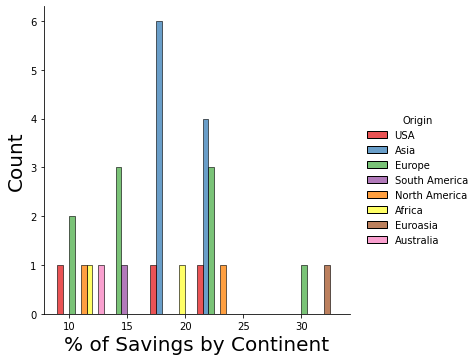

In [389]:
df_csv['Origin'] = ['USA','USA','USA','Asia','Europe','Asia','Europe','South America','North America','Africa','Asia','Europe','Asia','Asia','Euroasia','Asia','Asia','Europe','Europe','Africa','Europe','Asia','Europe','Europe','North America','Europe','Asia','Australia','Asia',]


# Lets plot this into 
sns.displot(data=df_csv, x="Savings %", hue="Origin", multiple="dodge")
plt.xlabel("% of Savings by Continent",size = 20)
plt.ylabel("Count",size = 20)

